count      100
unique       2
top       True
freq        94
Name: new reading, dtype: object

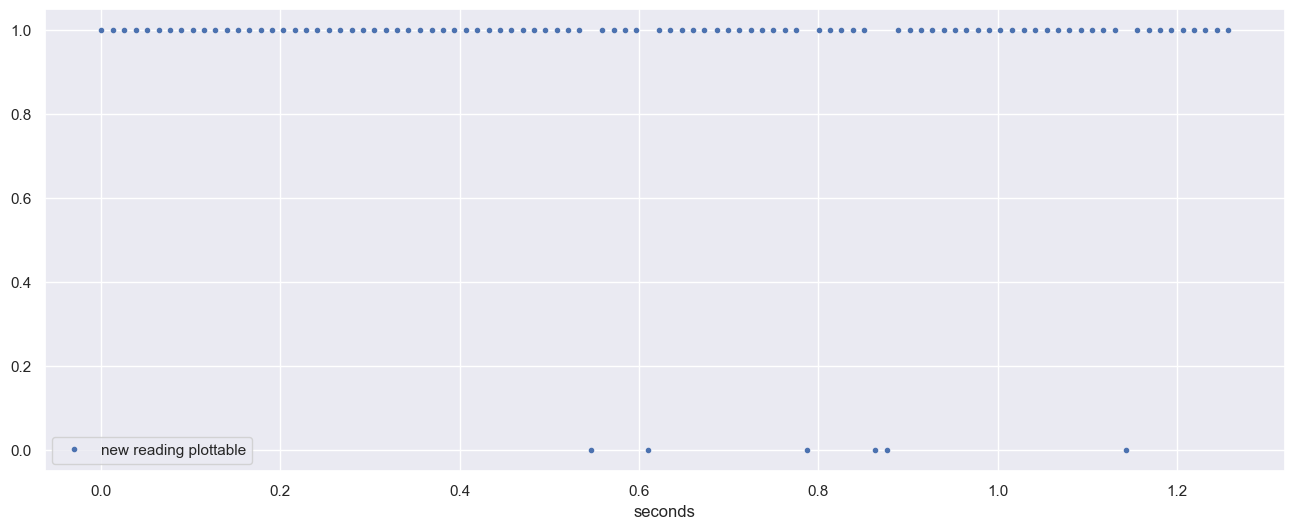

In [5]:
import pandas as pd  # https://pandas.pydata.org/pandas-docs/stable/reference/index.html

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn.objects as so

sns.set_theme()

characterization_files = [
#    "data\\raw_xl3d_timestamp.csv",
    "data\\raw_xl3d_timestamp_slept.csv",
]
all_frames = []
for data_file in characterization_files:
    data = pd.read_csv(
        data_file,
    )
    all_frames.append(data)

all_data = pd.concat(all_frames)
all_data = all_data.reset_index(drop=True)

initial_row = np.array([np.int64(255), np.int64(255), np.int64(255)])
initial_index = []
new_reading = []
for index, row in all_data.iterrows():
    preceding_row = initial_row if index == 0 else all_data.loc[index-1, ["raw x", "raw y", "raw z"]].array
    row_is_different = row[["raw x", "raw y", "raw z"]].array != preceding_row
    new_reading.append(row_is_different)

new_reading_frame = pd.DataFrame(new_reading, columns=["new x", "new y", "new z"])
new_value_acquired = []
for index, row in new_reading_frame.iterrows():
    new_value_acquired.append(row.any())

new_reading_frame["new reading"] = new_value_acquired

united_data = all_data.join(new_reading_frame)
united_data["new reading plottable"] = united_data["new reading"].astype(int)
united_data["seconds"] = ( united_data["monotonic ns"] - united_data.loc[0, "monotonic ns"] ) / 1e9
united_data.plot(x="seconds", y="new reading plottable", style=".", figsize=(16, 6))
united_data["new reading"].describe()